# Lab 6 + 7: Mạng Nơ-ron Nhân tạo (ANN) với PyTorch

## Giới thiệu
Chào buổi chiều đến các bạn sinh ziên yêu quý :)))

Trong lab này, chúng ta sẽ khám phá Mạng Nơ-ron Nhân tạo (ANN) - một "bộ não máy tính" đơn giản học từ dữ liệu. Nó giống như dạy máy tính phân biệt mèo và chó bằng cách cho nó xem nhiều ví dụ. Chúng ta sẽ:
- Tạo dữ liệu: điểm trong vòng tròn và vành đai.
- Dùng PyTorch để xây dựng mô hình ANN. :)))
- Xem ANN phân loại thế nào qua hình ảnh trực quan.

Hãy nghĩ ANN như một chiếc bánh sandwich: có lớp đầu vào, lớp ẩn "nêm gia vị", và lớp đầu ra cho kết quả nha :) Ahihi

## Lý thuyết về ANN

### 1. ANN là gì?
- **Định nghĩa**: Mạng Nơ-ron Nhân tạo (ANN) là một cách để máy tính học từ dữ liệu, giống như bạn dạy một đứa trẻ nhận biết mèo và chó bằng cách chỉ cho nó nhiều hình ảnh.  
- **Tại sao dùng ANN?**: Vì nó giỏi tìm quy luật trong dữ liệu phức tạp, như phân biệt điểm thuộc vòng tròn hay vành đai – thứ mà đường thẳng đơn giản không làm được.  
- **Ví dụ**: Nếu chúng ta có 300 điểm và muốn biết điểm nào thuộc nhóm nào, ANN tự học từ dữ liệu thay vì chúng ta phải viết quy tắc bằng tay.


### 2. Cấu trúc ANN
- ANN giống như một đội làm việc có 3 nhóm:  
  - **Lớp đầu vào**: Nhóm nhận thông tin. Ở đây có 2 người (2 nút), một người nhận $x$, một người nhận $y$.  
    - **Ví dụ**: Điểm (1, 2) vào, nút 1 nhận $1$, nút 2 nhận $2$.  
  - **Lớp ẩn**: Nhóm phân tích thông tin, có 4 người (4 nút) để "nghĩ" sâu hơn.  
    - **Tại sao 4 nút?**: Đây là lựa chọn trong lab này để thử nhiều cách nhìn dữ liệu, giúp tìm quy luật tốt hơn. Số nút có thể thay đổi tùy bài toán.  
    - **Ví dụ**: Họ nhìn $(1, 2)$ và tính xem nó gần gốc tọa độ hay xa.  
  - **Lớp đầu ra**: Nhóm đưa ra kết quả cuối, chỉ cần 1 người (1 nút) nói "lớp 0" hay "lớp 1".  
    - **Ví dụ**: Kết quả $0.7$ nghĩa là nghiêng về lớp 1.  

- **Hình ảnh minh họa**:  
  - Sơ đồ:  
    - Bên trái: 2 vòng tròn (đầu vào: $x, y$).  
    - Giữa: 4 vòng tròn nối với 2 vòng tròn trước bằng mũi tên (lớp ẩn).  
    - Bên phải: 1 vòng tròn nối với 4 vòng tròn giữa (đầu ra).  
  - Mỗi mũi tên là "trọng số" – độ quan trọng của thông tin.  
  - **Xem hình**: 

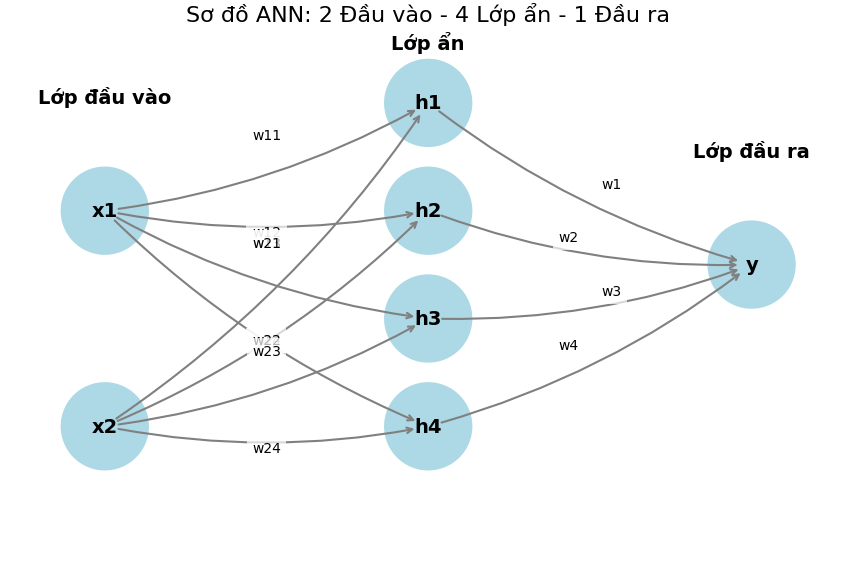



### 3. Trọng số và độ chệch
- **Trọng số (weights)**: Mỗi người trong lớp ẩn "đánh giá" $x$ và $y$ khác nhau, dựa trên độ quan trọng.  
  - **Ví dụ số**: Giả sử trọng số $w_1 = 0.5$, $w_2 = 0.3$. Với $x = 1$, $y = 2$, tổng là:  
    $$
    z = 0.5 \cdot 1 + 0.3 \cdot 2 = 0.5 + 0.6 = 1.1
    $$
  - **Tại sao lại cần thiết?**: Để quyết định $x$ hay $y$ ảnh hưởng nhiều hơn đến kết quả.  
- **Độ chệch(bias)**: Một số nhỏ thêm vào để điều chỉnh cho đúng.  
  - **Ví dụ số**: Nếu $b = 0.2$, tổng thành:  
    $$
    z = 1.1 + 0.2 = 1.3
    $$
  - **Tại sao độ chệch lại cần thiết?**: Để tránh kết quả bị lệch quá xa (như luôn gần $0$ dù dữ liệu lớn).  
- **Công thức đầy đủ**:  
  $$
  z = w_1 \cdot x + w_2 \cdot y + b
  $$

### 4. Hàm kích hoạt
- ANN không chỉ cộng trừ đơn giản (như máy tính cơ bản), mà còn hiểu được dữ liệu phức tạp nhờ hàm kích hoạt.  
- **ReLU (Rectified Linear Unit)**: Giữ số dương, bỏ số âm.  
  - **Công thức**:  
    $$
    \phi(z) = \max(0, z)
    $$
  - **Ví dụ số**: Với $z = 1.3$ thì $\phi(1.3) = 1.3$; với $z = -0.5$ thì $\phi(-0.5) = 0$.  
  - **Khi nào dùng ReLU?**: Thường dùng ở lớp ẩn vì nó đơn giản, nhanh, và giúp "tắt" những tính toán không quan trọng (khi $z < 0$), tập trung vào dữ liệu có ý nghĩa lớn hơn. Nó cũng tránh vấn đề gradient biến mất khi mạng sâu.  
- **Sigmoid**: Biến số thành xác suất từ $0$ đến $1$.  
  - **Công thức**:  
    $$
    \phi(z) = \frac{1}{1 + e^{-z}}
    $$
  - **Ví dụ số**: Với $z = 1.3$, $e^{-1.3} \approx 0.27$, nên:  
    $$
    \phi(1.3) \approx \frac{1}{1 + 0.27} \approx 0.79
    $$
  - **Khi nào dùng Sigmoid?**: Thường dùng ở lớp đầu ra khi cần kết quả dạng xác suất (ví dụ, phân loại nhị phân: $0$ hoặc $1$). Tuy nhiên, nó ít được dùng ở lớp ẩn vì dễ gây gradient nhỏ khi $z$ quá lớn hoặc quá nhỏ, làm chậm học.  

- **Hình ảnh minh họa**:  
  - **ReLU**: Đường thẳng từ $(0,0)$ lên khi $z > 0$, nằm ngang ở $0$ khi $z < 0$.  
  - **Sigmoid**: Đường cong mềm từ $0$ (khi $z$ âm lớn) đến $1$ (khi $z$ dương lớn), đi qua $0.5$ khi $z = 0$.  
  - **Xem hình**:
  
  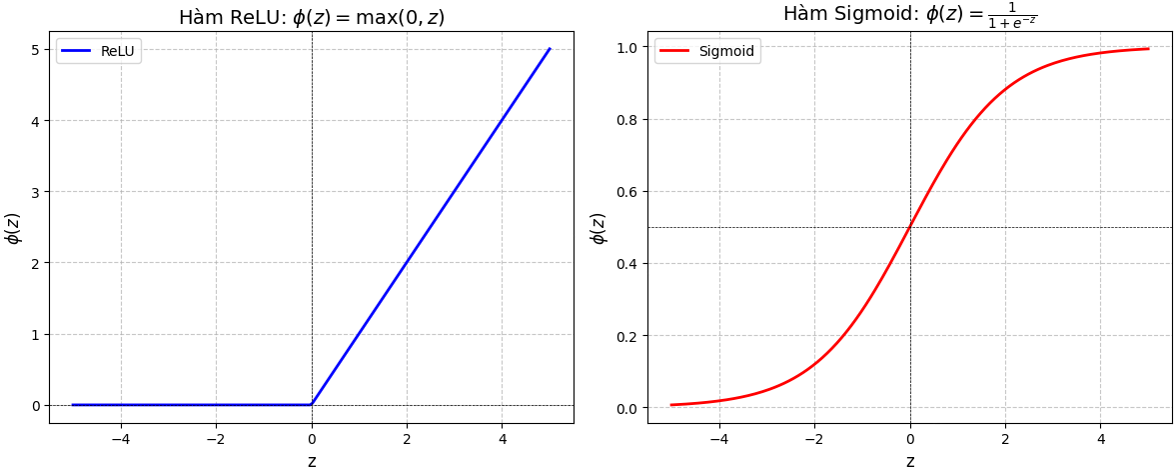

### 5. Lan truyền tiến (Forward Propagation)
- **Quy trình**: Dữ liệu đi qua từng lớp như chuyền bóng:  
  1. Từ đầu vào: $x = 1$, $y = 2$.  
  2. Lớp ẩn tính (giả sử 1 nút):  
     $$
     z = 0.5 \cdot 1 + 0.3 \cdot 2 + 0.2 = 1.3
     $$
     Sau đó, ReLU cho $\phi(1.3) = 1.3$.  
  3. Lớp đầu ra tính tiếp (giả sử trọng số $w = 0.4$, bias $b = 0.1$):  
     $$
     z = 0.4 \cdot 1.3 + 0.1 = 0.52 + 0.1 = 0.62
     $$
     Và Sigmoid cho $\phi(0.62) \approx 0.65$.  
- **Kết quả**: $0.65$ nghĩa là $65\%$ thuộc lớp 1.  
- **Lan truyền tiến để làm gì?**: Để dự đoán từ dữ liệu ban đầu qua các lớp.

### 6. Hàm mất mát (Loss Function)
- **Ý nghĩa**: Đo sai lầm giữa dự đoán và thực tế. Nếu dự đoán gần giá trị thực, mất mát nhỏ; nếu lệch xa, mất mát lớn.  
- **Công thức từ đâu mà có?**: Trong bài toán phân loại nhị phân (0 hoặc 1), ta dùng **Binary Cross-Entropy Loss**, dựa trên lý thuyết xác suất. Ý tưởng là so sánh phân phối xác suất dự đoán ($\hat{y}$) với nhãn thật ($y$), lấy log để phạt nặng hơn khi sai lệch lớn. Công thức:  
  $$
  L = -[y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y})]
  $$
  - $y$: Nhãn thực tế (0 hoặc 1).  
  - $\hat{y}$: Xác suất dự đoán từ Sigmoid (0 đến 1).  
  - **Giải thích**: Nếu $y = 1$, ta muốn $\hat{y}$ gần 1, nên $-\log(\hat{y})$ nhỏ khi $\hat{y}$ lớn; nếu $y = 0$, ta muốn $\hat{y}$ gần 0, nên $-\log(1 - \hat{y})$ nhỏ khi $\hat{y}$ nhỏ.  
- **Ví dụ**:  
  - Nếu $y = 1$ và $\hat{y} = 0.8$:  
    - $L = -\log(0.8) \approx 0.22$, dự đoán khá tốt.  
  - Nếu $y = 0$ và $\hat{y} = 0.3$:  
    - $L = -\log(1 - 0.3) = -\log(0.7) \approx 0.36$, cũng tương đối ổn.  
- **Trong lab**: Hàm mất mát tổng là trung bình của $L$ trên tất cả mẫu (ví dụ, dùng `nn.BCELoss()` với `X_train`).

### 7. Lan truyền ngược (Backpropagation)
- **Quy trình**: Sửa sai từ cuối về đầu:  
  1. Tính lỗi ở đầu ra: Với dự đoán $\hat{y} = 0.65$ và thực tế $y = 1$, lỗi là $y - \hat{y} = 0.35$ (trực giác đơn giản, thực tế dùng gradient).  
  2. Quay lại lớp ẩn: Xác định lỗi do trọng số nào gây ra bằng đạo hàm (gradient).  
  3. Điều chỉnh: Giảm trọng số nếu làm $z$ quá nhỏ, tăng nếu quá lớn.  
- **Công thức?**: Dựa trên **quy tắc chuỗi (chain rule)** trong vi tích phân. Gradient của mất mát $L$ theo trọng số $w$ được tính qua các lớp:  
  - Bước 1: Gradient của $L$ theo $\hat{y}$:  
    $$
    \frac{\partial L}{\partial \hat{y}} = -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}}
    $$
  - Bước 2: Gradient của $\hat{y}$ theo $z$ (với Sigmoid):  
    $$
    \frac{\partial \hat{y}}{\partial z} = \hat{y} \cdot (1 - \hat{y})
    $$
  - Bước 3: Gradient của $z$ theo $w$ (với $z = w \cdot x + b$):  
    $$
    \frac{\partial z}{\partial w} = x
    $$
  - Tổng hợp:  
    $$
    \frac{\partial L}{\partial w} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial w}
    $$
  - Cập nhật trọng số:  
    $$
    w = w - \alpha \cdot \frac{\partial L}{\partial w}
    $$
    ($\alpha$ là tốc độ học, ví dụ $0.01$).  
- **Ví dụ số**: Nếu $w = 0.5$, gradient $\frac{\partial L}{\partial w} \approx 0.35$ (giả định đơn giản), thì:  
  $$
  w = 0.5 - 0.01 \cdot 0.35 = 0.4965
  $$
- **Tại sao dùng lan truyền ngược?**: Để lần sau dự đoán chính xác hơn bằng cách điều chỉnh trọng số dựa trên lỗi.

### 8. Tối ưu hóa (Optimizer)
- **Ý nghĩa**: Giúp ANN sửa sai nhanh chóng và hiệu quả.  
- **Adam**: Một thuật toán tối ưu tiên tiến, kết hợp động lượng và RMSProp để cập nhật trọng số thông minh (như GPS tìm đường ngắn nhất).  
- **Ví dụ**: Thay vì chỉ điều chỉnh nhỏ đều đặn, Adam thay đổi lớn khi cần nhưng vẫn đảm bảo chính xác.  
- **Sử dụng tối ưu hóa để làm gì?**: Để ANN học nhanh hơn và đạt hiệu quả cao từ dữ liệu.

In [1]:
# Cài đặt thư viện
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Đặt seed để kết quả ổn định hơn (tùy chọn)
torch.manual_seed(42)
np.random.seed(42)

## Tạo dữ liệu tự tạo

Ta tạo 2 nhóm điểm:
- **Lớp 0**: Điểm trong vòng tròn nhỏ (bán kính 1). Ví dụ: gần gốc tọa độ.
- **Lớp 1**: Điểm trong vành đai (bán kính 1 đến 2). Ví dụ: xa gốc hơn.

Cách tạo:
- Dùng số ngẫu nhiên $u$ từ 0 đến 1, góc $\theta$ từ 0 đến $2\pi$.
- Lớp 0: $r = \sqrt{u}$.
- Lớp 1: $r = \sqrt{3u + 1}$.

Số điểm: 100 cho lớp 0, 200 cho lớp 1. Chia 80% để học, 20% để kiểm tra.


In [6]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split

# Tạo điểm cho lớp 0 (vòng tròn nhỏ)
def generate_class_0(n_samples):
    u = np.random.uniform(0, 1, n_samples)
    theta = np.random.uniform(0, 2 * np.pi, n_samples)
    r = np.sqrt(u)  # Bán kính nhỏ
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

# Tạo điểm cho lớp 1 (vành đai lớn hơn)
def generate_class_1(n_samples):
    u = np.random.uniform(0, 1, n_samples)
    theta = np.random.uniform(0, 2 * np.pi, n_samples)
    r = np.sqrt(3 * u + 1)  # Bán kính lớn hơn
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

# Tạo dữ liệu
X_class0 = generate_class_0(100)
X_class1 = generate_class_1(200)
y_class0 = np.zeros(100)  # Nhãn 0
y_class1 = np.ones(200)   # Nhãn 1

# Kết hợp dữ liệu
X = np.vstack((X_class0, X_class1))
y = np.hstack((y_class0, y_class1))

# Chia dữ liệu với 20% là test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển sang tensor PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).unsqueeze(1)  # Thêm chiều cho nhãn để phù hợp với BCELoss
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).unsqueeze(1)

# Kiểm tra kích thước dữ liệu
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: torch.Size([240, 2]), y_train shape: torch.Size([240, 1])
X_test shape: torch.Size([60, 2]), y_test shape: torch.Size([60, 1])


## Xây ANN bằng PyTorch
ANN đơn giản:
- **Lớp đầu vào**: 2 nút (x, y).
- **Lớp ẩn**: 4 nút với ReLU để "nghĩ".
- **Lớp đầu ra**: 1 nút với Sigmoid để ra 0 hoặc 1.

Học bằng:
- **Hàm mất mát**: BCELoss (đo sai lầm).
- **Tối ưu hóa**: Adam (điều chỉnh thông minh).
- Học 100 lần (epochs), mỗi lần dùng 32 điểm (batch).

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

# Xây dựng mô hình ANN chính xác
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 4)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)  # Chạy sigmoid cho đầu ra
        return x

# Khởi tạo mô hình
model = ANN()

# Định nghĩa hàm mất mát và tối ưu hóa
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Giả sử X_train và y_train là tensor
X_train = torch.randn(100, 2)  # 100 mẫu, 2 đặc trưng
y_train = torch.randint(0, 2, (100, 1)).float()  # Nhãn nhị phân (0 hoặc 1)

# Huấn luyện
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()  # Sửa lỗi zero_grad()
    outputs = model(X_train)  # Forward pass
    loss = criterion(outputs, y_train)  # Tính loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Cập nhật trọng số

    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [20/100], Loss: 0.6921
Epoch [40/100], Loss: 0.6901
Epoch [60/100], Loss: 0.6885
Epoch [80/100], Loss: 0.6867
Epoch [100/100], Loss: 0.6833


## Kiểm tra mô hình ANN
ANN đoán đúng bao nhiêu trên dữ liệu kiểm tra. Nếu dự đoán > 0.5 thì là lớp 1, nhỏ hơn là lớp 0.

In [6]:
# Kiểm tra
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float()  # Chuyển thành 0 hoặc 1
    accuracy = (y_pred.eq(y_test).sum() / y_test.size(0)).item()
    print(f"Độ chính xác: {accuracy*100:.2f}%")

Độ chính xác: 56.67%


## Visualization

- Điểm lớp 0 (xanh), lớp 1 (đỏ).
- Ranh giới quyết định (màu nền) để xem ANN phân loại thế nào.

Epoch [20/200], Loss: 0.6609
Epoch [40/200], Loss: 0.6309
Epoch [60/200], Loss: 0.5921
Epoch [80/200], Loss: 0.5404
Epoch [100/200], Loss: 0.4803
Epoch [120/200], Loss: 0.4157
Epoch [140/200], Loss: 0.3564
Epoch [160/200], Loss: 0.3048
Epoch [180/200], Loss: 0.2615
Epoch [200/200], Loss: 0.2261


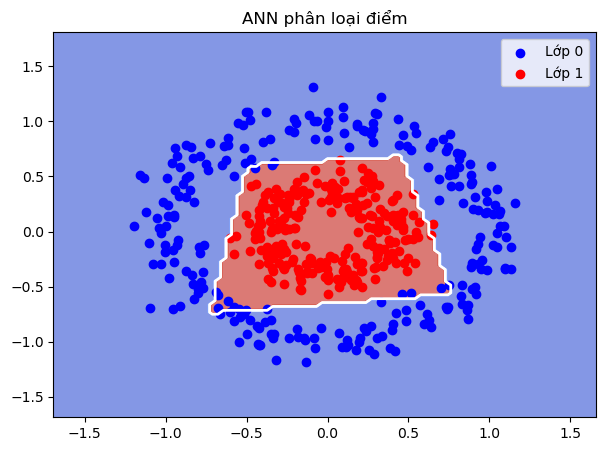

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Tạo dữ liệu dạng vòng tròn
X, y = make_circles(n_samples=500, noise=0.1, factor=0.4, random_state=42)
X = torch.FloatTensor(X)  # Chuyển sang tensor
y = torch.FloatTensor(y).reshape(-1, 1)  # Định dạng lại thành cột

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình ANN
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 4)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Khởi tạo mô hình
model = ANN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Huấn luyện
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Vẽ ranh giới
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

# Dự đoán trên lưới
model.eval()
with torch.no_grad():
    pred_grid = model(grid)
    pred_grid = (pred_grid > 0.5).float().cpu().numpy().reshape(xx.shape)

# Vẽ hình
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, pred_grid, alpha=0.7, cmap='coolwarm')  # Vùng ranh giới
plt.contour(xx, yy, pred_grid, levels=[0.5], colors='white', linewidths=2)  # Đường biên

# Chuyển dữ liệu sang NumPy
X_np = X.numpy()
y_np = y.numpy().ravel()

# Vẽ các điểm dữ liệu
plt.scatter(X_np[y_np == 0, 0], X_np[y_np == 0, 1], color='blue', label='Lớp 0')
plt.scatter(X_np[y_np == 1, 0], X_np[y_np == 1, 1], color='red', label='Lớp 1')

plt.legend()
plt.title("ANN phân loại điểm")
plt.show()


## Kết luận
Lab này cho thấy ANN có thể phân loại điểm không tách biệt tuyến tính (vòng tròn và vành đai). Kết quả thay đổi mỗi lần chạy vì dữ liệu ngẫu nhiên - giống như mỗi lần thi điểm khác nhau! Các bạn có thể thử thay đổi số nút hoặc số lần học để xem điều gì xảy ra.

# Bài tập về nhà:

## Mục tiêu
Sau khi hoàn thành lab về ANN, bài tập này giúp bạn củng cố kiến thức bằng cách:
1. Thay đổi cấu trúc ANN và quan sát ảnh hưởng đến hiệu suất.
2. Thử nghiệm với các hàm mất mát và tối ưu hóa khác.
3. Phân tích kết quả qua biểu đồ và số liệu.

## Hướng dẫn
- Sử dụng file `ANN_Lab.ipynb` từ lab làm nền tảng.
- Gửi bài làm dưới dạng file `.ipynb` với phần code và câu trả lời viết trong ô Markdown.
- Hạn nộp: 23h59p ngày 28/03/2025.

---

## Phần 1: Thay đổi cấu trúc ANN
### Yêu cầu
1. **Tăng số nút trong lớp ẩn**:  
   - Sửa lớp ẩn từ 4 nút thành 8 nút trong code định nghĩa `ANN`.  
   - Huấn luyện lại mô hình với cùng dữ liệu `X_train`, `y_train` từ lab (100 epochs).  
   - Ghi lại giá trị mất mát cuối cùng (`loss`) và độ chính xác trên tập kiểm tra (`X_test`, `y_test`).  

2. **Thêm một lớp ẩn**:  
   - Thêm một lớp ẩn thứ hai với 6 nút, dùng ReLU làm hàm kích hoạt. Cấu trúc mới:  
     - Đầu vào: 2 nút.  
     - Lớp ẩn 1: 8 nút (ReLU).  
     - Lớp ẩn 2: 6 nút (ReLU).  
     - Đầu ra: 1 nút (Sigmoid).  
   - Huấn luyện lại mô hình (100 epochs).  
   - Ghi lại giá trị mất mát cuối cùng và độ chính xác.

3. **Câu hỏi**:  
   - So sánh kết quả của 3 mô hình (4 nút, 8 nút, 8+6 nút):  
     - Mất mát cuối cùng thay đổi thế nào?  
     - Độ chính xác có cải thiện không? Tại sao bạn nghĩ vậy?  
   - Viết câu trả lời trong ô Markdown.

---

## Phần 2: Thử nghiệm với hàm mất mát và tối ưu hóa
### Yêu cầu
1. **Dùng BCEWithLogitsLoss thay cho BCELoss**:  
   - Thay `nn.BCELoss()` bằng `nn.BCEWithLogitsLoss()`.  
   - Xóa hàm Sigmoid khỏi lớp đầu ra của mô hình (vì `BCEWithLogitsLoss` tự xử lý).  
   - Huấn luyện lại mô hình với cấu trúc ban đầu (2-4-1, 100 epochs).  
   - Ghi lại mất mát cuối cùng và độ chính xác.

2. **Thay Adam bằng SGD**:  
   - Dùng lại cấu trúc ban đầu (2-4-1) với `nn.BCELoss()`.  
   - Thay `optim.Adam` bằng `optim.SGD` với `lr=0.01`.  
   - Huấn luyện lại (100 epochs).  
   - Ghi lại mất mát cuối cùng và độ chính xác.

3. **Câu hỏi**:  
   - So sánh kết quả:  
     - `BCEWithLogitsLoss` có khác gì so với `BCELoss` về mất mát và độ chính xác? Tại sao?  
     - `SGD` so với `Adam`: Mất mát giảm nhanh hơn hay chậm hơn? Độ chính xác thay đổi ra sao?  
   - Viết câu trả lời trong ô Markdown.

---

## Phần 3: Phân tích kết quả
### Yêu cầu
1. **Vẽ đồ thị mất mát**:  
   - Sửa code huấn luyện để lưu giá trị mất mát (`loss`) sau mỗi epoch vào một danh sách.  
   - Vẽ đồ thị mất mát theo epoch cho 3 trường hợp:  
     - Cấu trúc ban đầu (2-4-1, Adam, BCELoss).  
     - Cấu trúc 2-8-1 (Adam, BCELoss).  
     - Cấu trúc 2-4-1 (SGD, BCELoss).  
   - Dùng `matplotlib` để vẽ 3 đường trên cùng một đồ thị, thêm chú thích (`legend`).

2. **Câu hỏi**:  
   - Quan sát đồ thị:  
     - Mất mát giảm nhanh nhất ở trường hợp nào? Chậm nhất ở đâu?  
     - Có trường hợp nào mất mát không giảm đều không (dao động)? Giải thích tại sao.  
   - Viết câu trả lời trong ô Markdown.

---

## Định dạng nộp bài
- Tạo file `.ipynb` mới với cấu trúc:  
  - **Phần 1**: Code và câu trả lời cho "Thay đổi cấu trúc ANN".  
  - **Phần 2**: Code và câu trả lời cho "Thử nghiệm với hàm mất mát và tối ưu hóa".  
  - **Phần 3**: Code vẽ đồ thị và câu trả lời cho "Phân tích kết quả".  
- Đặt tên file: `[HọTên]_ANN_Homework.ipynb` (ví dụ: `NguyenVanA_ANN_Homework.ipynb`).

# Bài này sẽ học trong 2 tuần 